In [6]:
from collections import defaultdict
from keras.models import load_model
from skimage import io

import argparse
import cv2
import json
import logging
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# The raw-stiched mask has already been created.

In [3]:
raw_mask = io.imread("../../apl_research/analysis_pipeline_test_dir/analysis_work_dir/p1_z1/adjusted_stitched_mask.png")

In [4]:
raw_mask.shape

(1152, 1920)

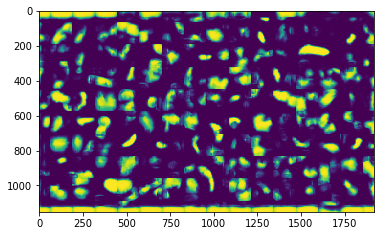

In [7]:
plt.imshow(raw_mask)

In [8]:
prob_thresh_1 = 0.5

In [26]:
binary_mask = raw_mask > 0.5 * 255

In [23]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import disk

In [27]:
binary_mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

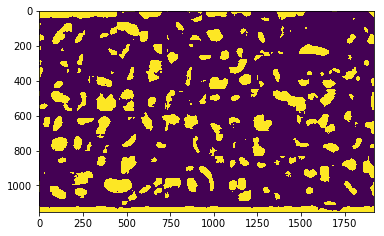

In [28]:
plt.imshow(binary_mask)

In [29]:
opened_mask = opening(binary_mask, disk(6))

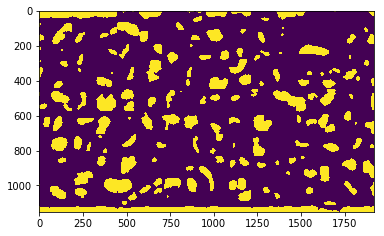

In [30]:
plt.imshow(opened_mask)

In [36]:
closed_mask = closing(opened_mask, disk(6))

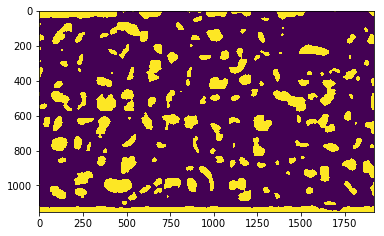

In [37]:
plt.imshow(closed_mask)

In [38]:
from skimage.measure import label, regionprops

In [39]:
label_image = label(closed_mask)

In [41]:
from skimage.color import label2rgb
image = io.imread("../../apl_research/analysis_pipeline_test_dir/analysis_work_dir/p1_z1/adjusted_frame.png")
image_label_overlay = label2rgb(label_image, image=image)

In [43]:
import matplotlib.patches as mpatches

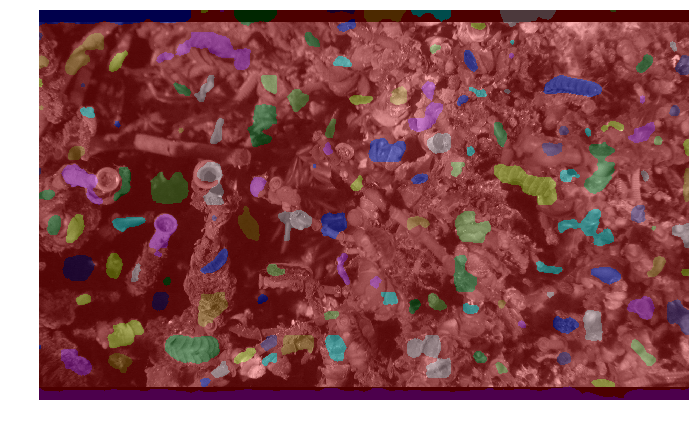

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [47]:
region = regionprops(label_image)[0]

In [48]:
region

In [49]:
region.area

16926

In [50]:
region.convex_area

19223

In [51]:
minr, minc, maxr, maxc = region.bbox

In [52]:
minr, minc, maxr, maxc

(0, 0, 47, 448)

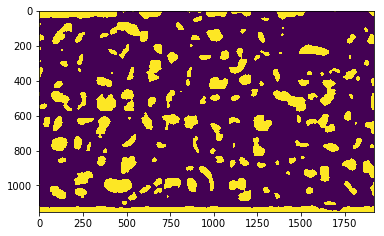

In [55]:
region.coords

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       ...,
       [45,  2],
       [45,  3],
       [46,  0]])

In [61]:
binary_mask.dtype

dtype('bool')

In [65]:
tuple([int(x) for x in region.centroid])

(18, 216)

In [69]:
adjusted_frame = io.imread("../../apl_research/analysis_pipeline_test_dir/analysis_work_dir/p1_z1/adjusted_frame.png")
adjusted_stitched_mask = io.imread("../../apl_research/analysis_pipeline_test_dir/analysis_work_dir/p1_z1/adjusted_stitched_mask.png")
frame = io.imread("../../apl_research/analysis_pipeline_test_dir/analysis_work_dir/p1_z1/CAMHDA301-20180712T001500_1259.png")

In [71]:
adjusted_stitched_mask.shape, adjusted_frame.shape

((1152, 1920), (1152, 1920, 3))

In [72]:
frame.shape

(1080, 1920, 3)

In [73]:
def _crop_center(img, cropx, cropy):
    y, x = img.shape
    startx = x // 2 - (cropx // 2)
    starty = y // 2 - (cropy // 2)
    return img[starty:starty + cropy, startx:startx + cropx]

In [74]:
raw_mask = _crop_center(adjusted_stitched_mask, 1920, 1080)

In [75]:
raw_mask.shape

(1080, 1920)

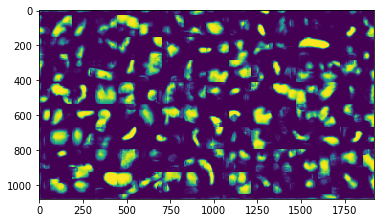

In [76]:
plt.imshow(raw_mask)

In [79]:
io.imsave("../../apl_research/analysis_pipeline_test_dir/analysis_work_dir/p1_z1/raw_mask.png", raw_mask)

In [82]:
coord = region.coords[0]

In [83]:
closed_mask[coord] = False

In [84]:
closed_mask * 255

array([[  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])